In [1]:
import math
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import pandas as pd

import zero

from zero.sgd_temporal import MangakiSGDTemporal

In [2]:
ratings_table = pd.read_csv('ratings.csv')

In [3]:
ratings_table

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [4]:
ratings_table["userId"] = np.unique(ratings_table["userId"], return_inverse=True)[1]
ratings_table["movieId"] = np.unique(ratings_table["movieId"], return_inverse=True)[1]


In [5]:
ratings_table["mean_of_user"] = ratings_table.groupby('userId')["rating"].transform('mean')
ratings_table["std_of_user"] = ratings_table.groupby('userId')["rating"].transform('std')
ratings_table["scaled_rating"] = (ratings_table["rating"] - ratings_table["mean_of_user"])

In [6]:
users = np.array(ratings_table[['userId']])[:,0]
items =np.array(ratings_table[['movieId']])[:,0]
ratings =np.array(ratings_table[['rating']])[:,0]
timestamps =np.array(ratings_table[['timestamp']])[:,0]
mean_of_user = np.array(ratings_table[['mean_of_user']])[:,0]
std_of_user = np.array(ratings_table[['std_of_user']])[:,0]
scaled_ratings = np.array(ratings_table[['scaled_rating']])[:,0]


In [7]:
from collections import Counter

movieIds = ratings_table["movieId"]
counter_movies = Counter(movieIds).most_common(15)

most_common_movies = [x[0] for x in counter_movies]

most_common_movies

[314, 277, 257, 510, 1938, 224, 418, 97, 507, 461, 2224, 0, 897, 46, 2144]

In [8]:
ratings_table["ratings_by_movie"] = ratings_table.groupby('movieId')["rating"].transform('count')

In [9]:
nb_users = len(ratings_table.groupby("userId").count())
nb_items = len(ratings_table.groupby("movieId").count())

In [10]:
sgd = MangakiSGDTemporal(nb_users, nb_items)


initialization done
training rmse = 1.3905429323226346
testing rmse = 1.419522633840367
training rmse = 0.8967001836581079
testing rmse = 0.9262210274426186
training rmse = 0.871545276604002
testing rmse = 0.8837606409007266
training rmse = 0.8628350605179295
testing rmse = 0.8699040982464005
training rmse = 0.8574540121982958
testing rmse = 0.8625699214852331
training rmse = 0.8524629562115287
testing rmse = 0.8571324341884148
training rmse = 0.8467942964362406
testing rmse = 0.8520828925606247
training rmse = 0.8400112471548369
testing rmse = 0.8468854407603748
training rmse = 0.8321175523882877
testing rmse = 0.8414976704175344
training rmse = 0.8234809733108598
testing rmse = 0.8361473111988726
training rmse = 0.8146319950746004
testing rmse = 0.8311128159172526
training rmse = 0.8060139346644367
testing rmse = 0.8265709286715932
training rmse = 0.797859186372684
testing rmse = 0.822569671225156
training rmse = 0.7902188616145975
testing rmse = 0.81907501888479
training rmse = 0.78

0.805207273565747

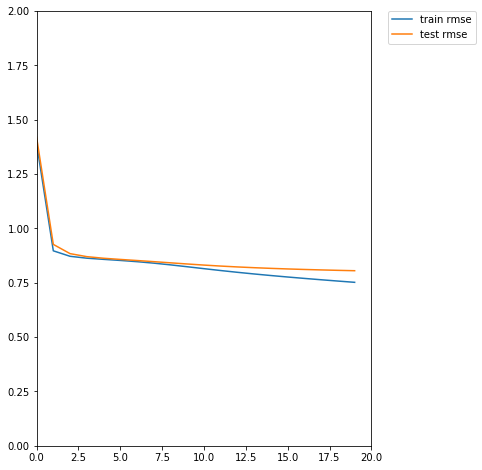

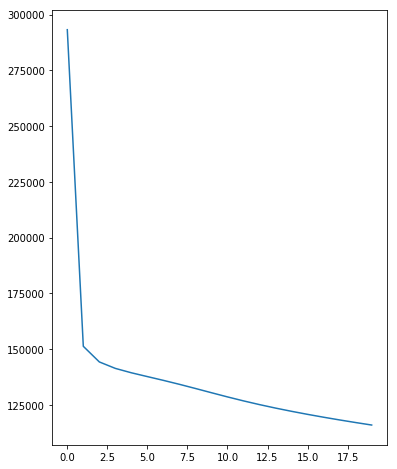

In [11]:
sgd.new_global_test(users, items, ratings, timestamps, mean_of_user, std_of_user, scaled_ratings, dynamic_strategy = "no temporal factor")

<IPython.core.display.Javascript object>


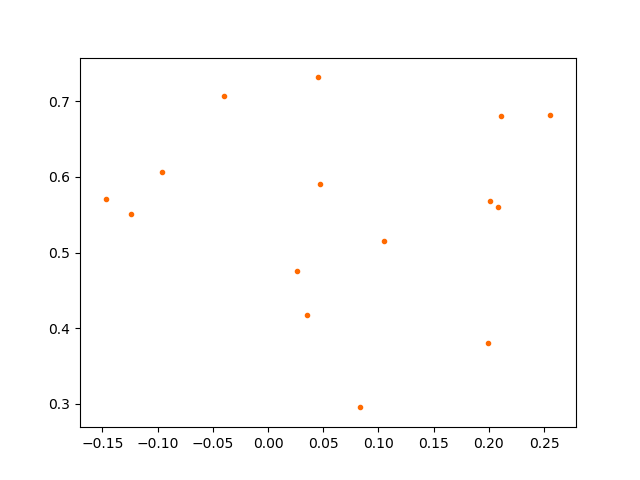

In [29]:


fig, ax = plt.subplots()

def display_title(x, y):

    plt.annotate(title_of_point[(x, y)], xy=(x, y), xycoords='data',
        xytext=(-30, -30), textcoords='offset points',
        arrowprops=dict(arrowstyle="->",
                        connectionstyle="arc3,rad=.2")
        )

def onpick(event):
    ind = most_common_movies[event.ind[0]]
    x, y = X_to_scatter[ind], Y_to_scatter[ind]
    a +=1
    display_title(x, y)

def load_points(X,Y, fig,ax,marker='.', color='#FF6A00', titles=None):
    ax.scatter(X,Y, marker=marker, c=color, picker=True)

    
V = sgd.V
np.save("Vmatrix.npy", V)



X_to_scatter, Y_to_scatter = V[most_common_movies,0],V[most_common_movies,1]


#plt.scatter(X_to_scatter,Y_to_scatter)

title_of_point = dict([(tuple([X_to_scatter[i], Y_to_scatter[i]]), most_common_movies[i]) for i in range(len(most_common_movies))])

load_points(X_to_scatter, Y_to_scatter, fig, ax)

fig.canvas.mpl_connect('pick_event', onpick)
plt.show()


<IPython.core.display.Javascript object>


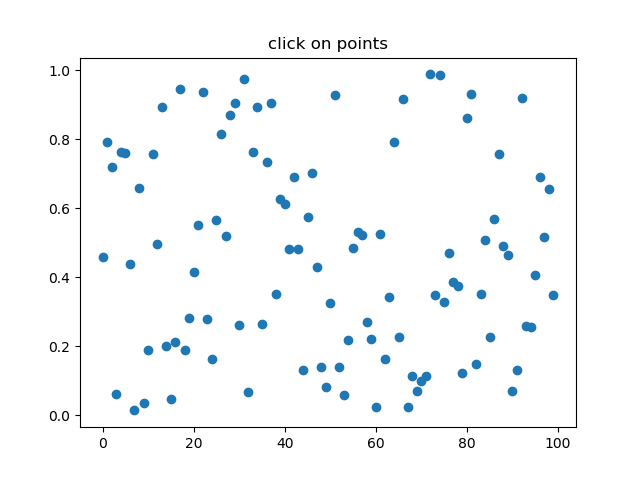

In [27]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('click on points')

line, = ax.plot(np.random.rand(100), 'o', picker=5)  # 5 points tolerance

def onpick(event):
    thisline = event.artist
    xdata = thisline.get_xdata()
    ydata = thisline.get_ydata()
    ind = event.ind
    points = tuple(zip(xdata[ind], ydata[ind]))
    print('onpick points:', points)

fig.canvas.mpl_connect('pick_event', onpick)

plt.show()

In [30]:
most_common_movies

[314, 277, 257, 510, 1938, 224, 418, 97, 507, 461, 2224, 0, 897, 46, 2144]

In [14]:
#sgd.new_global_test(users, items, ratings, timestamps, mean_of_user, std_of_user, scaled_ratings, dynamic_strategy = "exponential")

In [15]:
#sgd.cl_global_test(users, items, ratings, timestamps, mean_of_user, std_of_user, scaled_ratings, dynamic_strategy = "exponential factor")